<a href="https://colab.research.google.com/github/RewGuardiano/AI_Module_Assignment/blob/main/RewGuardiano_Genetic_Algorithm_Assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm Assignment
30% of the overall grade for this module

Marks indciated in sections below are based on percentage of marks allocated for this module

In this assignment you must choose a problem, and attempt to use the Genetic Alogrithm that we developed in class to solve this problem.





## The Problem         **(~30%)**

*   Description of the problem





---
# ** Sudoku Solver**

 This will generate valid Soduku solutions.

---
- Sudoku is a logical-based number placement puzzle.
- It consists of 9x9 grid which is divided into 9 3x3 sub-grids like boxes.
- The digits 1 through 9 should appear exactly once in each row.
- The digits 1 through 9 should appear exactly once in each column.
- Every 3x3 sub-grid has exactly one instance of each of the integers 1 through 9.

**Completing the grid while keeping to the given constraints is the task, and certain numbers are pre-filled as clues.**


---



*   Discussion of the suitablity of Genetic Algorithms


---
# The Genetic Algorithm is ideal for solving Sudoku for following reasons:

**Managing Constraints:**
By creating a fitness function that provides adherence to rules, the genetic algorithm can be adjusted towards correct solutions.

**Flexibility in Representation:** The grid,rows,columns and sub-grids make a clear represetation as a indiviual/chromosome in the GA. Applying genetic operators like crossover and mutation is hence straightforward.

**Global Search Capability:** Since solving Sudoku requires satisfying several constraints (rows, columns, and sub-grids), GAs' ability to do a global search is significant.

**As seen with the Cost Function**
 - Penalises when Soduku rules are violated e.g. duplicated numbers in rows and columns.
 - The perfect cost will be equal to 0. The cost will increase with the amount of constraints each individual violates.

**Exploration through Population:** Unlike traditional backtracking techniques that investigate solutions one after the other, GAs investigate several possibilities simultaneously (through the population), increasing the possibility of discovering a workable solution.


**The Benefit of Mutation and Crossover:** By expanding the pool of potential solutions, processes like mutation and crossover keep the algorithm from being trapped in one singe optimal solution.

---



In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_individual():
  sudoku = np.zeros((9,9), dtype=int)  # Initialize empty grid
  for i in range(9):
    numbers = list(range(1,10))
    random.shuffle(numbers)
    sudoku[i]= numbers
  return sudoku

**Firstly, this function generates a random soduku grid. The code: **


*   Creates a 9x9 grid filled with zeros
*   for each row it creates a random numbers from 1-9
*   For optimisation, It ensures that every row already meets the Sudoku requirement of having direct numbers of 1-9. Since the cost function will check duplicates from columns and subgrids.  
*   Then returns the entire grid as a NumPy array







*   Complexity of the problem  (Overall marks allocated based on ..)

# The problem and the cost function   **(~20%)**

The cost function will:

*   Look for duplicates in the columns.
*   Verify indiviual 3x3 grids from the whole Soduku grid.
*   In both columns and each 3x3 grids, the more duplicates or violations results in higher cost function.

*  Sum of all violations determines how good the cost function of a solution to a soduku board is. The cost of a perfect Soduku solution should be zero.








Cost of random grid: 56


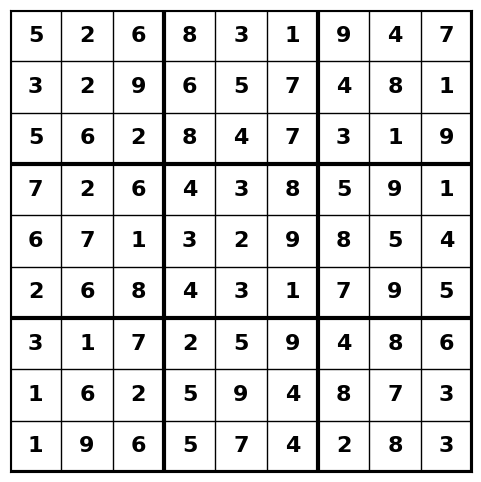

In [11]:
class SudokuProblem:
    def __init__(self):
        self.grid_size = 9
        self.subgrid_size = 3
        self.min_value = 1
        self.max_value = 9
        self.cost_function = self.sudoku_cost
        self.acceptable_cost = 0

    def sudoku_cost(self, sudoku):
        conflicts = 0
        # Check columns
        for col in range(9):
            conflicts += 9 - len(np.unique(sudoku[:, col]))
        # Check 3x3 subgrids
        for i in range(0, 9, 3):
            for j in range(0, 9, 3):
                subgrid = sudoku[i:i+3, j:j+3].flatten()
                conflicts += 9 - len(np.unique(subgrid))
        return conflicts

# Visualization function
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Test the cost function
prob = SudokuProblem()
test_grid = generate_individual()
cost = prob.cost_function(test_grid)
print(f"Cost of random grid: {cost}")
visualize_sudoku(test_grid)

**The cost function assesses a Sudoku grid's adheres with the rules**

The code above:

1. **SudokuProblem Class**:
   - Defines problem parameters and the cost function.
2. **Cost Function (`sudoku_cost`)**:
   - Columns: For each of the 9 columns, calculates duplicates as `9 - unique values`.
   - Sub-grids: For each of the 9 sub-grids, flattens the 3x3 section and counts duplicates similarly.
   - Total cost is the sum of all conflicts.
3. **Visualization**:
   - Plots the grid with thicker lines for 3x3 boundaries and numbers centered in cells.
4. **Test**:
   - Generates a random grid and computes its cost, typically high due to column and sub-grid violations.














# The Individual **(~30%)**


*   Chromosone
*   Crossover
*   Mutation



## Discussion and justification on the approaches taken for the above

---


**Individual**
 - Each individual represents one possible Sudoku solution.
 - The solution is encoded in a chromosome as a 9x9 grid.

**Chromosome**
- A 9x9 NumPy array where each cell contains a number from 1 to 9.
- Initialised with 'generate_individual()', which ensures that each row is a permutation of 1-9, simplifying the optimisation work.

**Crossover**:
- combines two parents using a method influenced by Partially Matched Crossover (PMX).
- Chooses two crossover locations and switches segments between parents for a random selection of rows (with a 50% chance each row).
(-) Duplicates outside the swapped segment are resolved via a mapping dictionary, maintaining row permutations.
Child1 may begin as [9, 3, 7, 8, 2, 4, 5, 6, 7], and mapping (e.g., 2→7, 1→8) corrects duplication to preserve 1-9 uniqueness if Parent1 row = [9, 3, 2, 1, 8, 4, 5, 6, 7] and Parent2 row = [6, 1, 7, 8, 2, 9, 5, 3, 4], with points 2-4.
Justification: PMX mixes parental features while guaranteeing row validity, which is essential for Sudoku.


**Mutation**:
- Randomly swaps two numbers within the same row (10% chance per row).
- Example: [4, 5, 2, 7, 3, 9, 1, 6, 8] → [4, 7, 2, 5, 3, 9, 1, 6, 8] (swaps positions 1 and 3).
- Justification: Preserves row uniqueness while altering column and sub-grid arrangements, introducing diversity assessed by the cost function.
---





In [12]:
from copy import deepcopy

class SudokuIndividual:
    def __init__(self, prob):
        self.chromosome = generate_individual()
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, mutation_rate=0.1):
        for row in range(9):
            if random.random() < mutation_rate:
                i, j = random.sample(range(9), 2)
                self.chromosome[row, i], self.chromosome[row, j] = self.chromosome[row, j], self.chromosome[row, i]
        self.cost = prob.cost_function(self.chromosome)
#PMX Crossover
    def crossover(self, parent2, prob):
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        for row in range(9):
            if random.random() < 0.5:
                p1_row = self.chromosome[row]
                p2_row = parent2.chromosome[row]
                point1, point2 = sorted(random.sample(range(9), 2))
                mapping1 = dict(zip(p2_row[point1:point2], p1_row[point1:point2]))
                mapping2 = dict(zip(p1_row[point1:point2], p2_row[point1:point2]))
                c1_row = p1_row.copy()
                c2_row = p2_row.copy()
                c1_row[point1:point2] = p2_row[point1:point2]
                c2_row[point1:point2] = p1_row[point1:point2]
                for i in range(9):
                    if i < point1 or i >= point2:
                        while c1_row[i] in c1_row[point1:point2]:
                            c1_row[i] = mapping1.get(c1_row[i], c1_row[i])
                        while c2_row[i] in c2_row[point1:point2]:
                            c2_row[i] = mapping2.get(c2_row[i], c2_row[i])
                child1.chromosome[row] = c1_row
                child2.chromosome[row] = c2_row
        child1.cost = prob.cost_function(child1.chromosome)
        child2.cost = prob.cost_function(child2.chromosome)
        return child1, child2

**Explanation of class SudokuIndividual:**:
A chromosome is created and its first cost is calculated using the - **`__init__`** function.
- **`mutate`**: Updates the cost by switching two consecutive places with a 10% chance.
- **`crossover`**: Permutation preservation is ensured by implementing PMX per row (50% chance).

## Running the algorithm  **(~10%)**

*   Parameter choices
*   Modifications (if any) to run_genetic
*   Rationale for the above



---

(Double click then ...)  Type Here...

---



In [ ]:
#  Parameter class here

In [ ]:
# Run Genetic method here

In [ ]:
#  Running of the algorithm with outputs here

In [ ]:
#  If changes to params or reruns of iterations dont overwrite, create more cells and copy code down to show evolution of final solution

## Results and conclusions    **(~10%)**

---

(Double click then ...)  Type Here...

---

